## Airbnb Effect on housing price in United States
by Yuen Tsai

### Hypothesis:
Airbnb price has strong correlation with long term rental rates in U.S. housing market.

### Description:
Airbnb has been launched since 2008. This new and popular short term leasing platform give many house owner a chance to rent their house to tourist in short term. This convenience also lead to other unpredicted situation. Based on recent change in housing market, many researchers started to blame airbnb for contributing to the increasing housing price.

Because housing price can be influenced by many factors, I will choose the airbnb from different type of cities to see the overall influence(Chicago, Boston, Seattle, San Francisco, etc.). For the time period, I will use the last 10 years airbnb data in those specific cities and explore its possible correlation and causation with those cities’ housing price on Zillow.


### Methodology: 
Correlation is not the same as causation. However, we can try to prove whether these two trend has correlation. If they do not have correlation, then they must not be the causation relationship. Here, we will use pandas in python and Jupyter notebook to conduct analysis, the trend of airbnb price and Zillow long term rental rate.

### Data source:

Airbnb data source: http://insideairbnb.com/get-the-data.html
Zillow housing related data source https://www.zillow.com/research/data/

#### 13 cities at United States who have data on airbnb from 2015-2019
Chicago, Seattle, San Francisco, Los Angelous, Austin, Boston, Nashville, New Orleans, New York City, Oakland, Portland, San Diego, Washington, D.C.


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def get_airbnb_listing(year, city):
    '''
    get airbnb data in specific year from local file
    
    >>> airbnb_listing = get_airbnb_listing("2019","Chicago")
    >>> airbnb_listing['price'].head(10)
    0     $50.00
    1    $117.00
    2    $255.00
    3     $80.00
    4    $150.00
    5     $35.00
    6    $215.00
    7     $99.00
    8    $289.00
    9     $99.00
    Name: price, dtype: object
    
    '''
    
    url = "/Users/jimmytsai/Downloads/" +  city +  "_" + year + "_listings.csv"
    listing = pd.read_csv(url,',')
    listing = listing[['city','neighbourhood_cleansed','property_type','room_type','beds','price','zipcode']]
    return listing


In [3]:
get_airbnb_listing("2019","Chicago").head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode
0,Chicago,Hyde Park,Condominium,Private room,1.0,$50.00,60637
1,Chicago,South Lawndale,Apartment,Entire home/apt,4.0,$117.00,60608
2,Chicago,Lincoln Park,Condominium,Entire home/apt,4.0,$255.00,60614
3,Chicago,West Town,Apartment,Entire home/apt,1.0,$80.00,60622
4,Chicago,Lincoln Park,Apartment,Entire home/apt,2.0,$150.00,60614
5,Chicago,Hyde Park,Apartment,Private room,1.0,$35.00,60615
6,Chicago,Lincoln Park,Apartment,Entire home/apt,2.0,$215.00,60614
7,Chicago,Near North Side,Condominium,Entire home/apt,1.0,$99.00,60610
8,Chicago,Lincoln Park,Boutique hotel,Private room,1.0,$289.00,60614
9,Chicago,West Town,Apartment,Entire home/apt,2.0,$99.00,60642


In [4]:
def get_all_list_from_airbnb(year_list, city):
    
    '''
    use city and the yaer we want to explore to extract the airbnb data from local file
    >>> all_list = get_all_list_from_airbnb([2015,2017,2018,2019],"Chicago")
    >>> all_list['price'].head(10)
    0    142.0
    1    120.0
    2     85.0
    3    125.0
    4     75.0
    5     95.0
    6    275.0
    7    175.0
    8    100.0
    9     80.0
    Name: price, dtype: float64

    '''
    
    home_list = pd.DataFrame() 

    for y in year_list:
        newlist = get_airbnb_listing(str(y), city)
        newlist['year'] = y
        home_list = home_list.append(newlist,ignore_index=True)

    home_list['price'] = home_list['price'].str[1:]
    home_list['price'] = home_list['price'].str.replace(',','').astype(float)
    
    return home_list


In [5]:
chicago_list = get_all_list_from_airbnb([2015,2017,2018,2019],"Chicago")
chicago_list['category']= "chicago"
chicago_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
0,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,142.0,60625,2015,chicago
1,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,120.0,60625,2015,chicago
2,Chicago,Lincoln Square,House,Entire home/apt,1.0,85.0,60625,2015,chicago
3,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,125.0,60625,2015,chicago
4,Chicago,Lincoln Square,Apartment,Private room,1.0,75.0,60625,2015,chicago
5,Chicago,Lincoln Square,House,Private room,1.0,95.0,60618,2015,chicago
6,Chicago,Lincoln Square,Apartment,Entire home/apt,5.0,275.0,60625,2015,chicago
7,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,175.0,60640,2015,chicago
8,Chicago,Lincoln Square,Apartment,Entire home/apt,1.0,100.0,60625,2015,chicago
9,Chicago,Lincoln Square,Apartment,Private room,1.0,80.0,60625,2015,chicago


In [6]:
chicago_list.dtypes

city                       object
neighbourhood_cleansed     object
property_type              object
room_type                  object
beds                      float64
price                     float64
zipcode                    object
year                        int64
category                   object
dtype: object

#### Let's see the airbnb housing number nad average price in Chicago from 2015 to 2019

In [7]:
chicago_list_agg = chicago_list.groupby('year').agg(['count', 'mean'])
chicago_list_agg

beds           price            
     count      mean count        mean
year                                  
2015  5134  1.641995  5147  149.549252
2017  5204  1.912952  5207  136.210486
2018  6875  2.009164  6877  134.671659
2019  7801  2.129086  7803  143.041907

#### Then we narrow down the dataset to 1 bedroom apartment and 2 bedroom apartment in Chicago to see how difference insight we can get from data set

In [8]:
chicago_1b_apt_list = chicago_list[chicago_list['beds'] == 1.0][chicago_list['room_type'] == "Entire home/apt" ]
chicago_1b_apt_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
2,Chicago,Lincoln Square,House,Entire home/apt,1.0,85.0,60625,2015,chicago
8,Chicago,Lincoln Square,Apartment,Entire home/apt,1.0,100.0,60625,2015,chicago
16,Chicago,Lincoln Square,Apartment,Entire home/apt,1.0,85.0,60640,2015,chicago
19,Chicago,Lincoln Square,House,Entire home/apt,1.0,102.0,60640,2015,chicago
21,Chicago,Lincoln Square,Apartment,Entire home/apt,1.0,90.0,60625,2015,chicago
23,Chicago,Lincoln Square,Condominium,Entire home/apt,1.0,110.0,60625,2015,chicago
27,Chicago,Lincoln Square,Apartment,Entire home/apt,1.0,150.0,60625,2015,chicago
30,Chicago,Lincoln Square,Apartment,Entire home/apt,1.0,90.0,60625,2015,chicago
35,Chicago,Lincoln Square,Apartment,Entire home/apt,1.0,60.0,60625,2015,chicago
39,Chicago,Lincoln Square,Apartment,Entire home/apt,1.0,107.0,60625,2015,chicago


In [9]:
chicago_1b_apt_list_agg = chicago_1b_apt_list.groupby('year').agg(['count', 'mean'])
chicago_1b_apt_list_agg

beds      price            
     count mean count        mean
year                             
2015  1230  1.0  1230  144.454472
2017   965  1.0   965  127.753368
2018  1230  1.0  1230  121.067480
2019  1366  1.0  1366  123.987555

In [10]:
chicago_2b_apt_list = chicago_list[chicago_list['beds'] == 2.0][chicago_list['room_type'] == "Entire home/apt" ]
chicago_2b_apt_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
0,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,142.0,60625,2015,chicago
1,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,120.0,60625,2015,chicago
3,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,125.0,60625,2015,chicago
7,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,175.0,60640,2015,chicago
14,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,210.0,60625,2015,chicago
22,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,150.0,60625,2015,chicago
24,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,125.0,60625,2015,chicago
43,Chicago,Lincoln Square,Condominium,Entire home/apt,2.0,150.0,60625,2015,chicago
44,Chicago,Lincoln Square,House,Entire home/apt,2.0,150.0,60625,2015,chicago
57,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,150.0,60625,2015,chicago


In [11]:
chicago_2b_apt_list_agg = chicago_2b_apt_list.groupby('year').agg(['count', 'mean'])
chicago_2b_apt_list_agg

beds      price            
     count mean count        mean
year                             
2015  1050  2.0  1050  198.404762
2017  1061  2.0  1061  168.161169
2018  1333  2.0  1333  158.206302
2019  1571  2.0  1571  154.979631

In [12]:
chicago_private_room_list = chicago_list[chicago_list['room_type'] == "Private room" ]
chicago_private_room_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
4,Chicago,Lincoln Square,Apartment,Private room,1.0,75.0,60625,2015,chicago
5,Chicago,Lincoln Square,House,Private room,1.0,95.0,60618,2015,chicago
9,Chicago,Lincoln Square,Apartment,Private room,1.0,80.0,60625,2015,chicago
10,Chicago,Lincoln Square,Apartment,Private room,1.0,55.0,60625,2015,chicago
11,Chicago,Lincoln Square,Condominium,Private room,1.0,70.0,60625,2015,chicago
13,Chicago,Lincoln Square,Apartment,Private room,2.0,75.0,60625,2015,chicago
15,Chicago,Lincoln Square,Apartment,Private room,1.0,60.0,60625,2015,chicago
17,Chicago,Lincoln Square,Apartment,Private room,1.0,55.0,60625,2015,chicago
20,Chicago,Lincoln Square,Apartment,Private room,1.0,60.0,60625,2015,chicago
28,Chicago,Lincoln Square,Apartment,Private room,1.0,60.0,60625,2015,chicago


In [13]:
chicago_private_room_list_agg = chicago_private_room_list.groupby('year').agg(['count', 'mean'])
chicago_private_room_list_agg

beds           price           
     count      mean count       mean
year                                 
2015  1968  1.157012  1972  86.103448
2017  1946  1.234841  1949  71.412519
2018  2432  1.246711  2434  76.237058
2019  2522  1.275971  2524  83.068938

In [14]:
def get_zillow_data(number_of_bedroom):
    '''
    Extract the zillow data from local file based on the number_of_bedroom we want to explore
    >>> zillow_data = get_zillow_data('1')
    >>> zillow_data['New York, NY']
    2015    2200.0
    2016    2200.0
    2017    2195.0
    2018    2195.0
    2019    2150.0
    Name: New York, NY, dtype: float64


    '''
    zillow_path = "/Users/jimmytsai/Downloads/Metro_MedianRentalPrice_" + number_of_bedroom +"Bedroom.csv"
    zillow = pd.read_csv(zillow_path,',')
    new_zillow = zillow[(zillow['RegionName'] == "Chicago, IL") | (zillow['RegionName'] == "New York, NY")| (zillow['RegionName'] == "Washington, DC") |(zillow['RegionName'] == "Boston, MA") |(zillow['RegionName'] == "San Francisco, CA") |(zillow['RegionName'] == "Seattle, WA") |(zillow['RegionName'] == "Portland, OR") |(zillow['RegionName'] == "Austin, TX") |(zillow['RegionName'] == "Nashville, TN")|(zillow['RegionName'] == "New Orleans, LA")|(zillow['RegionName'] == "San Diego, CA")|(zillow['RegionName'] == "Los Angeles-Long Beach-Anaheim, CA")][['RegionName','2015-06','2016-06','2017-06','2018-06','2019-03']]
    new_zillow = new_zillow.set_index('RegionName')
    new_zillow = new_zillow.T
    new_zillow.rename(index = {"2015-06": 2015, 
                     "2016-06":2016,"2017-06":2017,"2018-06":2018,"2019-03":2019}, 
                                 inplace = True)
    return new_zillow


In [15]:
new_zillow_1b = get_zillow_data('1')
new_zillow_1b

RegionName,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Washington, DC","Boston, MA","San Francisco, CA","Seattle, WA","San Diego, CA","Portland, OR","Austin, TX","Nashville, TN","New Orleans, LA"
2015,2200.0,1725.0,1395.0,1750.0,1975.0,2549.5,1545.0,1617.5,1230.0,985.0,1100.0,1150.0
2016,2200.0,1850.0,1425.0,1735.0,1995.0,2700.0,1664.0,1620.0,1395.0,1070.0,1397.0,1195.0
2017,2195.0,1968.5,1425.0,1795.0,1995.0,2718.0,1850.0,1771.0,1390.0,1090.0,1410.0,1150.0
2018,2195.0,2035.0,1495.0,1800.0,2090.0,2631.0,1865.0,1920.0,1395.0,1169.0,1380.0,1095.0
2019,2150.0,2125.0,1595.0,1850.0,2100.0,2795.0,1826.5,1855.0,1395.0,1221.0,1393.0,1087.0


### Then we use get_all_list_from_airbnb method to extract the data from different city from 2015 to 2019

In [16]:
seattle_list = get_all_list_from_airbnb([2015,2016,2018,2019],"Seattle")
seattle_list['category']= "seattle"
seattle_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
0,Seattle,Belltown,Apartment,Private room,1.0,59.0,98121,2015,seattle
1,Seattle,Belltown,Apartment,Shared room,1.0,45.0,98121,2015,seattle
2,Seattle,Belltown,Apartment,Entire home/apt,2.0,225.0,98121,2015,seattle
3,Seattle,Belltown,Apartment,Entire home/apt,1.0,200.0,98121,2015,seattle
4,Seattle,First Hill,Apartment,Shared room,1.0,74.0,98104,2015,seattle
5,Seattle,North Beacon Hill,House,Shared room,1.0,30.0,98144,2015,seattle
6,Seattle,Phinney Ridge,Apartment,Shared room,1.0,37.0,98103,2015,seattle
7,Seattle,Broadway,Apartment,Shared room,1.0,25.0,98122,2015,seattle
8,Seattle,Broadway,House,Shared room,1.0,46.0,98102,2015,seattle
9,Seattle,Broadway,House,Shared room,1.0,55.0,98122,2015,seattle


In [17]:
sanfrancisco_list = get_all_list_from_airbnb([2015,2016,2017,2018,2019],"Sanfrancisco")
sanfrancisco_list['category']= "sanfrancisco"
sanfrancisco_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
0,San Francisco,Castro/Upper Market,House,Entire home/apt,2.0,250.0,94114,2015,sanfrancisco
1,San Francisco,Inner Richmond,Apartment,Private room,1.0,89.0,94118,2015,sanfrancisco
2,San Francisco,South of Market,Apartment,Private room,1.0,164.0,94103,2015,sanfrancisco
3,San Francisco,Nob Hill,Apartment,Entire home/apt,2.0,170.0,94109,2015,sanfrancisco
4,San Francisco,Potrero Hill,Apartment,Entire home/apt,2.0,185.0,94107,2015,sanfrancisco
5,San Francisco,Pacific Heights,Apartment,Private room,1.0,135.0,94115,2015,sanfrancisco
6,San Francisco,South of Market,Loft,Shared room,1.0,70.0,94103,2015,sanfrancisco
7,San Francisco,Nob Hill,Apartment,Entire home/apt,1.0,125.0,94109,2015,sanfrancisco
8,San Francisco,Nob Hill,Apartment,Entire home/apt,1.0,140.0,94109,2015,sanfrancisco
9,San Francisco,Nob Hill,Apartment,Private room,1.0,69.0,94133,2015,sanfrancisco


In [18]:
losangeles_list = get_all_list_from_airbnb([2015,2016,2017,2018,2019],"Losangeles")
losangeles_list['category']= "losangeles"

losangeles_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
0,Los Angeles,Venice,Apartment,Entire home/apt,2.0,145.0,90291,2015,losangeles
1,Los Angeles,Venice,Apartment,Entire home/apt,2.0,175.0,90291,2015,losangeles
2,Rancho Palos Verdes,Rancho Palos Verdes,Villa,Private room,1.0,295.0,90275,2015,losangeles
3,Los Angeles,Hollywood,Condominium,Private room,1.0,110.0,90028,2015,losangeles
4,Santa Monica,Venice,Loft,Entire home/apt,2.0,600.0,90405,2015,losangeles
5,Los Angeles,Hollywood,House,Entire home/apt,1.0,95.0,90046,2015,losangeles
6,Los Angeles,West Hollywood,House,Private room,1.0,90.0,90046,2015,losangeles
7,Los Angeles,Beverly Grove,House,Entire home/apt,3.0,274.0,90048,2015,losangeles
8,North Hollywood,North Hollywood,Apartment,Entire home/apt,4.0,99.0,91601,2015,losangeles
9,Venice,Venice,Apartment,Entire home/apt,2.0,159.0,90291,2015,losangeles


In [19]:
austin_list = get_all_list_from_airbnb([2015,2017,2018,2019],"Austin")
austin_list['category']= "austin"
austin_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
0,Austin,78704,Apartment,Entire home/apt,2.0,425.0,78704,2015,austin
1,Austin,78704,House,Entire home/apt,4.0,574.0,78704,2015,austin
2,Austin,78704,House,Private room,1.0,150.0,78704,2015,austin
3,Austin,78704,House,Private room,1.0,99.0,78704,2015,austin
4,Austin,78704,House,Entire home/apt,2.0,185.0,78704,2015,austin
5,Austin,78704,House,Entire home/apt,4.0,130.0,78704,2015,austin
6,Austin,78704,House,Private room,1.0,185.0,78704,2015,austin
7,Austin,78704,House,Entire home/apt,1.0,139.0,78704,2015,austin
8,Austin,78704,House,Entire home/apt,3.0,500.0,78704,2015,austin
9,Austin,78724,House,Entire home/apt,3.0,289.0,78724,2015,austin


In [20]:
boston_list = get_all_list_from_airbnb([2015,2016,2017,2018,2019],"Boston")
boston_list['category']= "boston"
boston_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
0,Boston,Roslindale,House,Private room,1.0,62.0,02131,2015,boston
1,Boston,Roslindale,Apartment,Private room,1.0,65.0,02131,2015,boston
2,Boston,Roslindale,Apartment,Private room,1.0,75.0,02131,2015,boston
3,Boston,Roslindale,House,Entire home/apt,2.0,110.0,02131,2015,boston
4,Boston,Roslindale,House,Private room,1.0,75.0,02131,2015,boston
5,Boston,Roslindale,Apartment,Private room,1.0,70.0,02131,2015,boston
6,Boston,Roslindale,House,Private room,1.0,49.0,02131,2015,boston
7,Boston,Roslindale,Apartment,Private room,1.0,50.0,02131,2015,boston
8,Boston,Roslindale,Apartment,Private room,1.0,60.0,02131,2015,boston
9,Boston,Roslindale,Villa,Private room,1.0,40.0,02131,2015,boston


In [21]:
nashville_list = get_all_list_from_airbnb([2015,2016,2017,2018,2019],"Nashville")
nashville_list['category']= "nashville"
nashville_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
0,Nashville,District 1,House,Private room,1.0,54.0,37218,2015,nashville
1,Nashville,District 1,Cabin,Entire home/apt,1.0,350.0,37080,2015,nashville
2,Nashville,District 1,House,Entire home/apt,8.0,510.0,37218,2015,nashville
3,Nashville,District 1,House,Private room,1.0,45.0,37218,2015,nashville
4,Nashville,District 1,House,Private room,1.0,150.0,37218,2015,nashville
5,Nashville,District 1,House,Entire home/apt,1.0,125.0,37080,2015,nashville
6,Nashville,District 1,House,Entire home/apt,2.0,290.0,37218,2015,nashville
7,Nashville,District 1,House,Entire home/apt,4.0,108.0,37218,2015,nashville
8,Nashville,District 1,House,Entire home/apt,9.0,202.0,37218,2015,nashville
9,Nashville,District 1,Bed & Breakfast,Entire home/apt,4.0,85.0,37080,2015,nashville


In [22]:
neworleans_list = get_all_list_from_airbnb([2015,2016,2017,2018,2019],"Neworleans")
neworleans_list['category']= "neworleans"
neworleans_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
0,New Orleans,Algiers Point,Apartment,Entire home/apt,4.0,85.0,70114,2015,neworleans
1,New Orleans,City Park,House,Entire home/apt,1.0,125.0,70119,2015,neworleans
2,New Orleans,City Park,Apartment,Entire home/apt,2.0,200.0,70119,2015,neworleans
3,New Orleans,City Park,House,Entire home/apt,4.0,150.0,70119,2015,neworleans
4,New Orleans,City Park,House,Entire home/apt,3.0,215.0,70119,2015,neworleans
5,New Orleans,City Park,Loft,Entire home/apt,1.0,125.0,70119,2015,neworleans
6,New Orleans,City Park,Apartment,Entire home/apt,3.0,142.0,70119,2015,neworleans
7,New Orleans,City Park,Apartment,Entire home/apt,1.0,500.0,70124,2015,neworleans
8,New Orleans,Desire Area,House,Shared room,1.0,100.0,70117,2015,neworleans
9,New Orleans,Desire Area,House,Private room,1.0,125.0,70126,2015,neworleans


In [23]:
newyork_list = get_all_list_from_airbnb([2015,2016,2017,2018,2019],"Newyork")
newyork_list['category']= "newyork"
newyork_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
0,New York,Midtown East,Apartment,Entire home/apt,1.0,160.0,10022,2015,newyork
1,New York,Hamilton Heights,Apartment,Entire home/apt,3.0,105.0,NaN,2015,newyork
2,Brooklyn,Bushwick,Apartment,Private room,2.0,58.0,11221,2015,newyork
3,New York,West Village,Apartment,Entire home/apt,1.0,185.0,10011,2015,newyork
4,New York,Chelsea,Apartment,Entire home/apt,2.0,195.0,10011,2015,newyork
5,Brooklyn,Carroll Gardens,Apartment,Entire home/apt,3.0,165.0,11231,2015,newyork
6,Brooklyn,Bushwick,Apartment,Private room,1.0,80.0,11207,2015,newyork
7,New York,Chinatown,Apartment,Private room,1.0,120.0,10013,2015,newyork
8,New York,East Village,Apartment,Entire home/apt,2.0,150.0,10003,2015,newyork
9,Brooklyn,Bedford-Stuyvesant,Apartment,Shared room,1.0,40.0,11221,2015,newyork


In [24]:
oakland_list = get_all_list_from_airbnb([2015,2016,2018,2019],"Oakland")
oakland_list['category']= "oakland"
oakland_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
0,Oakland,Northgate,Apartment,Shared room,1.0,45.0,94612,2015,oakland
1,Oakland,Bushrod,House,Shared room,1.0,38.0,94609,2015,oakland
2,Oakland,Longfellow,House,Shared room,1.0,35.0,94608,2015,oakland
3,Emeryville,Clawson,Apartment,Shared room,1.0,200.0,94608,2015,oakland
4,Oakland,Merritt,Apartment,Shared room,4.0,50.0,94606,2015,oakland
5,Oakland,Patten,Apartment,Shared room,2.0,55.0,94601,2015,oakland
6,Oakland,Bartlett,House,Shared room,3.0,65.0,94601,2015,oakland
7,Oakland,Reservoir Hill-Meadow Brook,House,Shared room,8.0,42.0,94601,2015,oakland
8,Oakland,Reservoir Hill-Meadow Brook,House,Shared room,8.0,42.0,94601,2015,oakland
9,Oakland,Lakewide,Apartment,Shared room,1.0,49.0,94612,2015,oakland


In [25]:
portland_list = get_all_list_from_airbnb([2015,2016,2017,2018,2019],"Portland")
portland_list['category']= "portland"
portland_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
0,Portland,Ashcreek/Crestwood,House,Private room,1.0,67.0,97219,2015,portland
1,Portland,Sabin/Irvington,House,Private room,1.0,79.0,97212,2015,portland
2,Portland,Bridlemile/Southwest Hills,Apartment,Entire home/apt,3.0,250.0,97221,2015,portland
3,Portland,Sylvan-Highlands,House,Entire home/apt,1.0,95.0,97221,2015,portland
4,Portland,Eastmoreland/Reed,Dorm,Shared room,1.0,17.0,97202,2015,portland
5,Portland,Hillside/Northwest District,Apartment,Entire home/apt,2.0,122.0,97210,2015,portland
6,Portland,Goose Hollow/Southwest Hills,Apartment,Entire home/apt,1.0,87.0,97201,2015,portland
7,Portland,Lents,Other,Private room,2.0,39.0,97266,2015,portland
8,Portland,Hillside/Northwest District,House,Entire home/apt,2.0,160.0,97210,2015,portland
9,Portland,Alameda/Irvington,House,Private room,2.0,55.0,97212,2015,portland


In [26]:
sandiego_list = get_all_list_from_airbnb([2015,2016,2018,2019],"Sandiego")
sandiego_list['category']= "sandiego"
sandiego_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
0,San Diego,La Jolla,Apartment,Entire home/apt,3.0,340.0,92109,2015,sandiego
1,San Diego,Grantville,House,Private room,1.0,50.0,92120,2015,sandiego
2,San Diego,San Carlos,House,Private room,1.0,58.0,92120,2015,sandiego
3,San Diego,San Carlos,Other,Private room,1.0,85.0,92120,2015,sandiego
4,San Diego,Del Cerro,House,Private room,1.0,56.0,92120,2015,sandiego
5,San Diego,Del Cerro,House,Private room,3.0,60.0,92120,2015,sandiego
6,San Diego,San Carlos,House,Private room,1.0,50.0,92120,2015,sandiego
7,San Diego,San Carlos,House,Private room,1.0,100.0,92120,2015,sandiego
8,San Diego,Allied Gardens,House,Private room,1.0,80.0,92124,2015,sandiego
9,San Diego,San Carlos,House,Private room,3.0,105.0,92120,2015,sandiego


In [27]:
washington_list = get_all_list_from_airbnb([2015,2017,2018,2019],"Washington")
washington_list['category']= "washington"
washington_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
0,Washington,"Capitol Hill, Lincoln Park",House,Entire home/apt,2.0,160.0,20003,2015,washington
1,Washington,"Capitol Hill, Lincoln Park",House,Entire home/apt,3.0,350.0,20003,2015,washington
2,Hyattsville,"Lamont Riggs, Queens Chapel, Fort Totten, Plea...",House,Private room,1.0,50.0,20782,2015,washington
3,Washington,"Southwest Employment Area, Southwest/Waterfron...",House,Private room,1.0,95.0,20024,2015,washington
4,Silver Spring,"Colonial Village, Shepherd Park, North Portal ...",Townhouse,Entire home/apt,1.0,50.0,20910,2015,washington
5,Washington,"Southwest Employment Area, Southwest/Waterfron...",Boat,Entire home/apt,4.0,99.0,20024,2015,washington
6,Washington,"Takoma, Brightwood, Manor Park",Condominium,Entire home/apt,2.0,100.0,20012,2015,washington
7,Mount Rainier,"Woodridge, Fort Lincoln, Gateway",Apartment,Entire home/apt,1.0,100.0,20712,2015,washington
8,Capitol Heights,"Capitol View, Marshall Heights, Benning Heights",House,Private room,1.0,38.0,20743,2015,washington
9,Takoma Park,"Takoma, Brightwood, Manor Park",Bed & Breakfast,Private room,1.0,71.0,20912,2015,washington


### Merge all the data from different city from 2015 to 2019

In [28]:
total_city_list = pd.DataFrame() 
total_city_list = total_city_list.append([chicago_list,seattle_list,sanfrancisco_list,losangeles_list,austin_list,boston_list,nashville_list,neworleans_list,newyork_list,oakland_list,portland_list,sandiego_list,washington_list],ignore_index=True)

In [29]:
total_city_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
0,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,142.0,60625,2015,chicago
1,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,120.0,60625,2015,chicago
2,Chicago,Lincoln Square,House,Entire home/apt,1.0,85.0,60625,2015,chicago
3,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,125.0,60625,2015,chicago
4,Chicago,Lincoln Square,Apartment,Private room,1.0,75.0,60625,2015,chicago
5,Chicago,Lincoln Square,House,Private room,1.0,95.0,60618,2015,chicago
6,Chicago,Lincoln Square,Apartment,Entire home/apt,5.0,275.0,60625,2015,chicago
7,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,175.0,60640,2015,chicago
8,Chicago,Lincoln Square,Apartment,Entire home/apt,1.0,100.0,60625,2015,chicago
9,Chicago,Lincoln Square,Apartment,Private room,1.0,80.0,60625,2015,chicago


### Below, we will use different number of bedrooms to conduct our analysis to dataset at Airbnb and Zillow.

### First, we will explore the correlation about 1b apartment's long term rental rate at Zillow and airbnb rate.

In [30]:
total_1b_apt_list = total_city_list[total_city_list['beds'] == 1.0][total_city_list['room_type'] == "Entire home/apt" ]

In [31]:
airbnb_1b_count_trend = total_1b_apt_list.groupby(['category','year'])['price'].agg('count').unstack()
airbnb_1b_count_trend

year,2015,2016,2017,2018,2019
category,,,,,
austin,933.0,NaN,1728.0,1945.0,2169.0
boston,689.0,905.0,1171.0,1426.0,1525.0
chicago,1230.0,NaN,965.0,1230.0,1366.0
losangeles,3834.0,4920.0,6833.0,8626.0,9534.0
nashville,261.0,421.0,560.0,708.0,748.0
neworleans,543.0,780.0,1040.0,1061.0,1210.0
newyork,8414.0,9887.0,9761.0,11037.0,11728.0
oakland,295.0,416.0,NaN,699.0,721.0
portland,468.0,697.0,824.0,1109.0,1276.0


In [32]:
airbnb_1b_price_trend = total_1b_apt_list.groupby(['category','year'])['price'].agg('mean').unstack()
airbnb_1b_price_trend

year,2015,2016,2017,2018,2019
category,,,,,
austin,202.395498,NaN,196.652199,182.682262,170.627017
boston,199.114659,184.434254,182.962425,210.654278,183.331803
chicago,144.454472,NaN,127.753368,121.067480,123.987555
losangeles,142.575639,138.466667,140.489829,138.369001,137.683868
nashville,134.559387,119.828979,139.953571,160.283898,183.536096
neworleans,159.173112,156.820513,142.842308,125.654100,136.004959
newyork,182.069170,172.188227,168.429054,165.793694,171.005798
oakland,112.077966,122.009615,NaN,117.937053,121.030513
portland,105.878205,107.220947,106.861650,104.895401,100.358934


### We can use pct_change to convert the original dataset from original price and number to percentage change 

In [33]:
airbnb_1b_count_pct_trend = airbnb_1b_count_trend.pct_change(axis='columns',fill_method = 'pad')
airbnb_1b_count_pct_trend

year,2015,2016,2017,2018,2019
category,,,,,
austin,NaN,0.000000,0.852090,0.125579,0.115167
boston,NaN,0.313498,0.293923,0.217763,0.069425
chicago,NaN,0.000000,-0.215447,0.274611,0.110569
losangeles,NaN,0.283255,0.388821,0.262403,0.105263
nashville,NaN,0.613027,0.330166,0.264286,0.056497
neworleans,NaN,0.436464,0.333333,0.020192,0.140434
newyork,NaN,0.175065,-0.012744,0.130724,0.062608
oakland,NaN,0.410169,0.000000,0.680288,0.031474
portland,NaN,0.489316,0.182209,0.345874,0.150586


In [34]:
airbnb_1b_price_pct_trend = airbnb_1b_price_trend.pct_change(axis='columns',fill_method = 'pad')
airbnb_1b_price_pct_trend

year,2015,2016,2017,2018,2019
category,,,,,
austin,NaN,0.000000,-0.028377,-0.071039,-0.065990
boston,NaN,-0.073728,-0.007980,0.151353,-0.129703
chicago,NaN,0.000000,-0.115615,-0.052334,0.024119
losangeles,NaN,-0.028820,0.014611,-0.015096,-0.004951
nashville,NaN,-0.109471,0.167944,0.145265,0.145069
neworleans,NaN,-0.014780,-0.089135,-0.120330,0.082376
newyork,NaN,-0.054270,-0.021832,-0.015647,0.031437
oakland,NaN,0.088614,0.000000,-0.033379,0.026230
portland,NaN,0.012682,-0.003351,-0.018400,-0.043248


### However, as you can see, it is still hard to get insight from these data. So, we use another way to visualize the trend of price and number of housing at Airbnb.

### Calculate percentage change based on the first year's value

In [35]:
new_zillow_pct_trend_1b = new_zillow_1b.apply(lambda x: x.div(x.iloc[0]).subtract(1).mul(100))
new_zillow_pct_trend_1b

RegionName,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Washington, DC","Boston, MA","San Francisco, CA","Seattle, WA","San Diego, CA","Portland, OR","Austin, TX","Nashville, TN","New Orleans, LA"
2015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016,0.000000,7.246377,2.150538,-0.857143,1.012658,5.903118,7.702265,0.154560,13.414634,8.629442,27.000000,3.913043
2017,-0.227273,14.115942,2.150538,2.571429,1.012658,6.609139,19.741100,9.489954,13.008130,10.659898,28.181818,0.000000
2018,-0.227273,17.971014,7.168459,2.857143,5.822785,3.196705,20.711974,18.701700,13.414634,18.680203,25.454545,-4.782609
2019,-2.272727,23.188406,14.336918,5.714286,6.329114,9.629339,18.220065,14.683153,13.414634,23.959391,26.636364,-5.478261


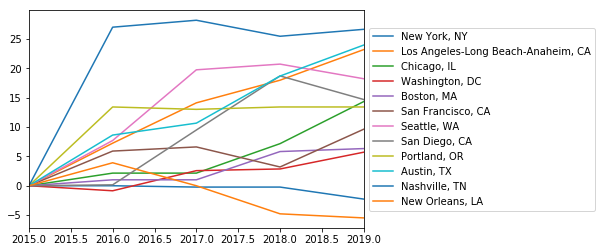

In [36]:
new_zillow_pct_trend_1b.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [37]:
def calculate_percentage_change(airbnb_trend):
    '''
    Do the transformation to the airbnb trend to calculate its percentage change based on the 2015 value in different city.
    
    >>> pct_change = calculate_percentage_change(airbnb_1b_count_trend)
    >>> pct_change['austin']
    year
    2015      0.000000
    2016     42.604502
    2017     85.209003
    2018    108.467310
    2019    132.475884
    Name: austin, dtype: float64

    '''
    airbnb_trend = airbnb_trend.T
    airbnb_percentage_trend = airbnb_trend.apply(lambda x: x.div(x.iloc[0]).subtract(1).mul(100))
    airbnb_percentage_trend = airbnb_percentage_trend.fillna((airbnb_percentage_trend.shift() + airbnb_percentage_trend.shift(-1))/2)
    return airbnb_percentage_trend

In [38]:
airbnb_1b_count_percentage_trend = calculate_percentage_change(airbnb_1b_count_trend)
airbnb_1b_count_percentage_trend

category,austin,boston,chicago,losangeles,nashville,neworleans,newyork,oakland,portland,sandiego,sanfrancisco,seattle,washington
year,,,,,,,,,,,,,
2015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016,42.604502,31.349782,-10.772358,28.325509,61.302682,43.646409,17.506537,41.016949,48.931624,70.160116,28.246984,39.817232,41.319149
2017,85.209003,69.956459,-21.544715,78.221179,114.559387,91.528545,16.009033,88.983051,76.068376,125.181951,39.886444,122.389034,82.638298
2018,108.467310,106.966618,0.000000,124.986959,171.264368,95.395948,31.174233,136.949153,136.965812,180.203785,-39.531583,204.960836,98.808511
2019,132.475884,121.335269,11.056911,148.669797,186.590038,122.836096,39.386736,144.406780,172.649573,224.017467,21.859475,237.467363,96.510638


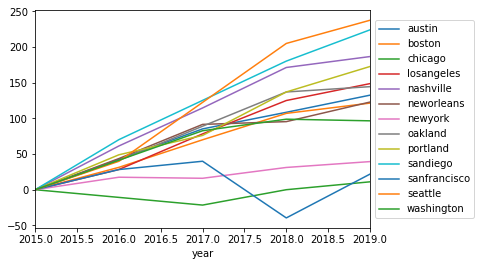

In [39]:
airbnb_1b_count_percentage_trend.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [40]:
new_zillow_pct_trend_1b

RegionName,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Washington, DC","Boston, MA","San Francisco, CA","Seattle, WA","San Diego, CA","Portland, OR","Austin, TX","Nashville, TN","New Orleans, LA"
2015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016,0.000000,7.246377,2.150538,-0.857143,1.012658,5.903118,7.702265,0.154560,13.414634,8.629442,27.000000,3.913043
2017,-0.227273,14.115942,2.150538,2.571429,1.012658,6.609139,19.741100,9.489954,13.008130,10.659898,28.181818,0.000000
2018,-0.227273,17.971014,7.168459,2.857143,5.822785,3.196705,20.711974,18.701700,13.414634,18.680203,25.454545,-4.782609
2019,-2.272727,23.188406,14.336918,5.714286,6.329114,9.629339,18.220065,14.683153,13.414634,23.959391,26.636364,-5.478261


In [41]:
def get_correlation_from_two_different_data(zillow_trend,airbnb_trend):
    '''
    print out all the correlation between zillow trend and airbnb trend
    >>> get_correlation_from_two_different_data(new_zillow_pct_trend_1b,airbnb_1b_count_percentage_trend)
    New york -0.7372270647336481
    Los Angeles 0.9859340306523956
    Chicago 0.6966314541028092
    Washington 0.80155656368757
    Boston 0.9194680652698576
    San Francisco 0.5673426344318022
    Seattle 0.8809433479759632
    San Diego 0.9024898982180164
    Portland 0.713359576694694
    Austin 0.9726438053828418
    Nashville 0.7400794757095881
    New Orleans -0.6746236823558277
    '''
    print('New york',zillow_trend['New York, NY'].corr(airbnb_trend['newyork']))
    print('Los Angeles',zillow_trend['Los Angeles-Long Beach-Anaheim, CA'].corr(airbnb_trend['losangeles']))
    print('Chicago',zillow_trend['Chicago, IL'].corr(airbnb_trend['chicago']))
    print('Washington',zillow_trend['Washington, DC'].corr(airbnb_trend['washington']))
    print('Boston',zillow_trend['Boston, MA'].corr(airbnb_trend['boston']))
    print('San Francisco',zillow_trend['San Francisco, CA'].corr(airbnb_trend['sanfrancisco']))
    print('Seattle',zillow_trend['Seattle, WA'].corr(airbnb_trend['seattle']))
    print('San Diego',zillow_trend['San Diego, CA'].corr(airbnb_trend['sandiego']))
    print('Portland',zillow_trend['Portland, OR'].corr(airbnb_trend['portland']))
    print('Austin',zillow_trend['Austin, TX'].corr(airbnb_trend['austin']))
    print('Nashville',zillow_trend['Nashville, TN'].corr(airbnb_trend['nashville']))
    print('New Orleans',zillow_trend['New Orleans, LA'].corr(airbnb_trend['neworleans']))


### We can see below description that the price on airbnb and the long term rental rate on zillow do not have obvious correlation between each of them in specific time

In [42]:
get_correlation_from_two_different_data(new_zillow_pct_trend_1b,airbnb_1b_count_percentage_trend)

New york -0.7372270647336481
Los Angeles 0.9859340306523956
Chicago 0.6966314541028092
Washington 0.80155656368757
Boston 0.9194680652698576
San Francisco 0.5673426344318022
Seattle 0.8809433479759632
San Diego 0.9024898982180164
Portland 0.713359576694694
Austin 0.9726438053828418
Nashville 0.7400794757095881
New Orleans -0.6746236823558277


In [43]:
airbnb_1b_price_percentage_trend = calculate_percentage_change(airbnb_1b_price_trend)
airbnb_1b_price_percentage_trend

category,austin,boston,chicago,losangeles,nashville,neworleans,newyork,oakland,portland,sandiego,sanfrancisco,seattle,washington
year,,,,,,,,,,,,,
2015,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016,-1.418831,-7.372840,-5.78075,-2.881960,-10.947143,-1.478013,-5.427027,8.861375,1.268195,-18.274613,8.595171,-13.583387,24.238211
2017,-2.837662,-8.112026,-11.56150,-1.462950,4.008776,-10.259776,-7.491722,7.044532,0.928846,-20.546061,10.855660,-6.815206,48.476422
2018,-9.739958,5.795464,-16.18987,-2.950461,19.117590,-21.058213,-8.939172,5.227688,-0.928240,-22.817509,-18.126339,-0.047025,29.303038
2019,-15.696239,-7.926516,-14.16842,-3.431000,36.397839,-14.555319,-6.076467,7.987785,-5.212849,-22.735528,-16.683230,3.002850,17.449586


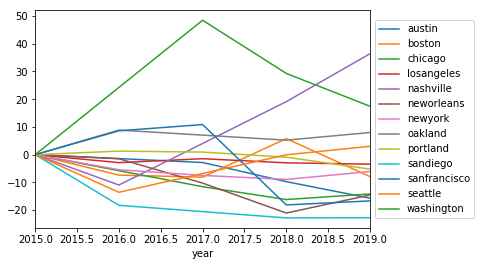

In [44]:
airbnb_1b_price_percentage_trend.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### We can see above description that the price on airbnb and the long term rental rate on zillow do not have obvious correlation between each of them in specific time

In [45]:
get_correlation_from_two_different_data(new_zillow_pct_trend_1b,airbnb_1b_price_percentage_trend)

New york 0.1743170097314974
Los Angeles -0.7818852818553359
Chicago -0.7231923093483871
Washington 0.22651315810410858
Boston 0.2398951216765637
San Francisco -0.09151975648578627
Seattle 0.19006504928749818
San Diego -0.7151895734215689
Portland -0.1809059167917771
Austin -0.9485711801983266
Nashville 0.26121653454808924
New Orleans 0.8331835394296175


In [46]:
# total_1b_apt_list
# zillow_1b_zip_path = "/Users/jimmytsai/Downloads/Zip_MedianRentalPrice_1Bedroom.csv"
# zillow_1b_zip = pd.read_csv(zillow_1b_zip_path,',')
# zillow_1b_zip
# total_1b_apt_zip_list = total_1b_apt_list[['price','zipcode','year']].groupby(['zipcode','year']).agg('mean').unstack()
# total_1b_apt_zip_list
# total_1b_apt_zip_list.dtypes
# total_1b_apt_zip_list['zipcode'] = total_1b_apt_zip_list.index
# total_1b_apt_zip_list
# total_1b_apt_zip_list['zipcode'] = total_1b_apt_zip_list['zipcode'].str[:5].replace(r'\s+', np.nan, regex=True).fillna(0).astype(int)
# total_1b_apt_zip_list.dtypes
# total_1b_apt_list.dtypes
# zillow_1b_zip.dtypes
# total_1b_apt_zip_list['zipcode'] = total_1b_apt_zip_list['zipcode'].str[:5].replace(r'\s+', np.nan, regex=True).fillna(0).astype(int)
# total_1b_apt_zip_list['zipcode']
# total_1b_apt_zip_list.reset_index()
# zipcode_data = zillow_1b_zip.merge(total_1b_apt_zip_list, how = 'left', left_on='RegionName', right_on='zipcode')
# zipcode_data
# zipcode_data.dtypes
# total_1b_apt_zip_list

In [47]:
total_2b_apt_list = total_city_list[total_city_list['beds'] == 2.0][total_city_list['room_type'] == "Entire home/apt" ]
total_2b_apt_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
0,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,142.0,60625,2015,chicago
1,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,120.0,60625,2015,chicago
3,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,125.0,60625,2015,chicago
7,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,175.0,60640,2015,chicago
14,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,210.0,60625,2015,chicago
22,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,150.0,60625,2015,chicago
24,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,125.0,60625,2015,chicago
43,Chicago,Lincoln Square,Condominium,Entire home/apt,2.0,150.0,60625,2015,chicago
44,Chicago,Lincoln Square,House,Entire home/apt,2.0,150.0,60625,2015,chicago
57,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,150.0,60625,2015,chicago


In [48]:
new_zillow_2b = get_zillow_data('2')
new_zillow_2b

RegionName,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Washington, DC","Boston, MA","San Francisco, CA","Seattle, WA","San Diego, CA","Portland, OR","Austin, TX","Nashville, TN","New Orleans, LA"
2015,2550.0,2210.0,1600.0,1950.0,2355.0,3000.0,1650.0,1970.0,1325.0,1275.0,1210.0,1250.0
2016,2542.0,2350.0,1650.0,1910.0,2350.0,3195.0,1860.0,1995.0,1450.0,1375.0,1395.0,1300.0
2017,2500.0,2500.0,1645.0,1990.0,2400.0,3200.0,1978.0,2189.0,1525.0,1400.0,1595.0,1300.0
2018,2500.0,2524.0,1725.0,2045.0,2450.0,3070.0,1965.0,2295.0,1525.0,1440.0,1468.0,1295.0
2019,2450.0,2595.0,1795.0,2075.0,2500.0,3200.0,1900.0,2300.0,1500.0,1510.0,1450.0,1200.0


In [49]:
new_zillow_pct_trend_2b = new_zillow_2b.apply(lambda x: x.div(x.iloc[0]).subtract(1).mul(100))
new_zillow_pct_trend_2b

RegionName,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Washington, DC","Boston, MA","San Francisco, CA","Seattle, WA","San Diego, CA","Portland, OR","Austin, TX","Nashville, TN","New Orleans, LA"
2015,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2016,-0.313725,6.334842,3.1250,-2.051282,-0.212314,6.500000,12.727273,1.269036,9.433962,7.843137,15.289256,4.0
2017,-1.960784,13.122172,2.8125,2.051282,1.910828,6.666667,19.878788,11.116751,15.094340,9.803922,31.818182,4.0
2018,-1.960784,14.208145,7.8125,4.871795,4.033970,2.333333,19.090909,16.497462,15.094340,12.941176,21.322314,3.6
2019,-3.921569,17.420814,12.1875,6.410256,6.157113,6.666667,15.151515,16.751269,13.207547,18.431373,19.834711,-4.0


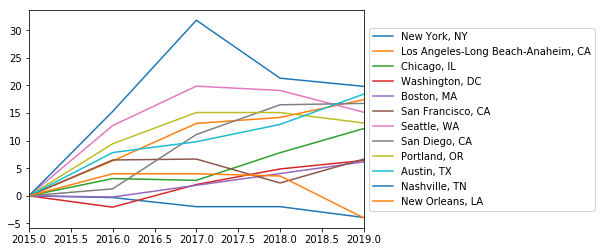

In [50]:
new_zillow_pct_trend_2b.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [51]:
airbnb_2b_count_trend = total_2b_apt_list.groupby(['category','year'])['price'].agg('count').unstack()
airbnb_2b_count_trend

year,2015,2016,2017,2018,2019
category,,,,,
austin,1164.0,NaN,2016.0,2379.0,2611.0
boston,472.0,794.0,1080.0,1245.0,1280.0
chicago,1050.0,NaN,1061.0,1333.0,1571.0
losangeles,2595.0,3661.0,5299.0,6781.0,7490.0
nashville,413.0,704.0,1150.0,1283.0,1364.0
neworleans,637.0,1079.0,1451.0,1450.0,1875.0
newyork,4928.0,6240.0,6431.0,7704.0,7982.0
oakland,194.0,292.0,NaN,551.0,535.0
portland,327.0,596.0,776.0,1174.0,1416.0


In [52]:
airbnb_2b_count_percentage_trend = calculate_percentage_change(airbnb_2b_count_trend)
airbnb_2b_count_percentage_trend

category,austin,boston,chicago,losangeles,nashville,neworleans,newyork,oakland,portland,sandiego,sanfrancisco,seattle,washington
year,,,,,,,,,,,,,
2015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016,36.597938,68.220339,0.523810,41.078998,70.460048,69.387755,26.623377,50.515464,82.262997,93.604651,51.862464,44.058501,73.557047
2017,73.195876,128.813559,1.047619,104.200385,178.450363,127.786499,30.499188,117.268041,137.308869,147.020349,65.520535,134.277879,147.114094
2018,104.381443,163.771186,26.952381,161.310212,210.653753,127.629513,56.331169,184.020619,259.021407,200.436047,-14.326648,224.497258,185.234899
2019,124.312715,171.186441,49.619048,188.631985,230.266344,194.348509,61.972403,175.773196,333.027523,244.912791,30.563515,240.950640,197.852349


In [53]:
airbnb_2b_price_trend = total_2b_apt_list.groupby(['category','year'])['price'].agg('mean').unstack()
airbnb_2b_price_trend

year,2015,2016,2017,2018,2019
category,,,,,
austin,290.264605,NaN,272.952877,243.912568,279.885101
boston,255.358051,238.186398,227.209259,243.650602,251.954688
chicago,198.404762,NaN,168.161169,158.206302,154.979631
losangeles,196.458574,188.906310,184.608983,185.037900,182.596262
nashville,189.157385,156.894886,184.126957,176.014030,210.321114
neworleans,209.061224,211.291937,186.787733,168.591034,209.965867
newyork,227.755682,204.697436,199.764111,198.540239,202.866951
oakland,149.226804,163.006849,NaN,142.286751,140.923364
portland,119.776758,120.119128,120.599227,126.408859,132.971751


In [54]:
airbnb_2b_price_percentage_trend = calculate_percentage_change(airbnb_2b_price_trend)
airbnb_2b_price_percentage_trend

category,austin,boston,chicago,losangeles,nashville,neworleans,newyork,oakland,portland,sandiego,sanfrancisco,seattle,washington
year,,,,,,,,,,,,,
2015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016,-2.982060,-6.724539,-7.621690,-3.844202,-17.055902,1.067014,-10.124114,9.234296,0.285839,-12.715017,32.651450,-12.466120,35.954951
2017,-5.964119,-11.023264,-15.243381,-6.031598,-2.659388,-10.654052,-12.290174,2.291811,0.686668,-16.908682,23.462356,-9.367685,71.909902
2018,-15.968890,-4.584719,-20.260834,-5.813273,-6.948370,-19.358057,-12.827536,-4.650674,5.537051,-21.102347,1.537214,-6.269250,41.055647
2019,-3.575876,-1.332781,-21.887142,-7.056100,11.188424,0.432716,-10.927820,-5.564308,11.016322,-18.138625,2.506714,-2.788434,41.211173


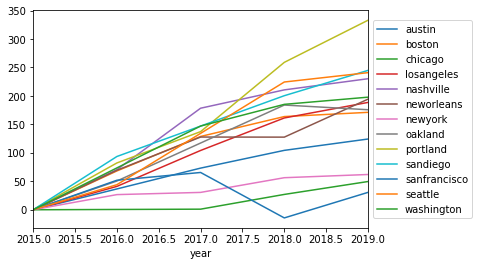

In [55]:
airbnb_2b_count_percentage_trend.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

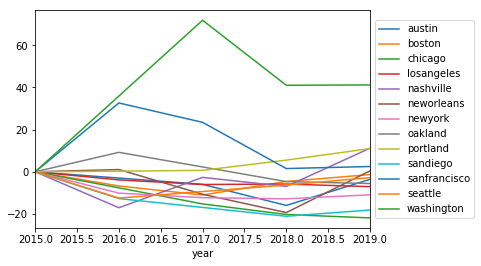

In [56]:
airbnb_2b_price_percentage_trend.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [57]:
get_correlation_from_two_different_data(new_zillow_pct_trend_2b,airbnb_2b_count_percentage_trend)

New york -0.8631093492410546
Los Angeles 0.9681531540258553
Chicago 0.9703612602135738
Washington 0.8352132828481781
Boston 0.868796398035444
San Francisco 0.8426370433345977
Seattle 0.7475363251334463
San Diego 0.9402861600494168
Portland 0.7590182318785308
Austin 0.9721771504429563
Nashville 0.7949894833632339
New Orleans -0.31031085153768967


In [58]:
get_correlation_from_two_different_data(new_zillow_pct_trend_2b,airbnb_2b_price_percentage_trend)

New york 0.6028843788927291
Los Angeles -0.979451104890268
Chicago -0.8770387502414098
Washington 0.3079883342105696
Boston 0.20743636059637038
San Francisco 0.6578262403702781
Seattle -0.5864504977286311
San Diego -0.8510998865579095
Portland 0.4703423036739711
Austin -0.45190744616776984
Nashville 0.0032687209389029967
New Orleans -0.5226383765797763


In [59]:
total_3b_apt_list = total_city_list[total_city_list['beds'] == 3.0][total_city_list['room_type'] == "Entire home/apt" ]
total_3b_apt_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
12,Chicago,Lincoln Square,Apartment,Entire home/apt,3.0,125.0,60625,2015,chicago
29,Chicago,Lincoln Square,Apartment,Entire home/apt,3.0,225.0,60625,2015,chicago
41,Chicago,Lincoln Square,Condominium,Entire home/apt,3.0,139.0,60625,2015,chicago
45,Chicago,Lincoln Square,House,Entire home/apt,3.0,129.0,60625,2015,chicago
69,Chicago,Lincoln Square,Apartment,Entire home/apt,3.0,150.0,60625,2015,chicago
73,Chicago,Lincoln Square,Apartment,Entire home/apt,3.0,155.0,60618,2015,chicago
79,Chicago,Lincoln Square,House,Entire home/apt,3.0,110.0,60625,2015,chicago
117,Chicago,Hyde Park,Apartment,Entire home/apt,3.0,135.0,60615,2015,chicago
121,Chicago,Hyde Park,House,Entire home/apt,3.0,194.0,60637,2015,chicago
152,Chicago,Hyde Park,Apartment,Entire home/apt,3.0,252.0,60615,2015,chicago


In [60]:
new_zillow_3b = get_zillow_data('3')
new_zillow_3b

RegionName,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Washington, DC","Boston, MA","San Francisco, CA","Seattle, WA","San Diego, CA","Portland, OR","Austin, TX","Nashville, TN","New Orleans, LA"
2015,2800.0,2800.0,1800.0,2100.0,2795.0,3200.0,1750.0,2400.0,1595.0,1589.5,1450.0,1300.0
2016,2995.0,2900.0,1850.0,2090.0,2800.0,3500.0,1950.0,2550.0,1700.0,1646.5,1500.0,1450.0
2017,2850.0,3150.0,1901.0,2150.0,2900.0,3500.0,2300.0,2750.0,1825.0,1675.0,1695.0,1400.0
2018,2845.0,3200.0,2000.0,2249.0,3000.0,3550.0,2295.5,2800.0,1850.0,1700.0,1650.0,1499.5
2019,2650.0,3200.0,1950.0,2200.0,3100.0,3500.0,2200.0,2809.5,1825.0,1789.0,1660.0,1400.0


In [61]:
new_zillow_pct_trend_3b = new_zillow_3b.apply(lambda x: x.div(x.iloc[0]).subtract(1).mul(100))
new_zillow_pct_trend_3b

RegionName,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Washington, DC","Boston, MA","San Francisco, CA","Seattle, WA","San Diego, CA","Portland, OR","Austin, TX","Nashville, TN","New Orleans, LA"
2015,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016,6.964286,3.571429,2.777778,-0.476190,0.178891,9.3750,11.428571,6.250000,6.583072,3.586033,3.448276,11.538462
2017,1.785714,12.500000,5.611111,2.380952,3.756708,9.3750,31.428571,14.583333,14.420063,5.379050,16.896552,7.692308
2018,1.607143,14.285714,11.111111,7.095238,7.334526,10.9375,31.171429,16.666667,15.987461,6.951872,13.793103,15.346154
2019,-5.357143,14.285714,8.333333,4.761905,10.912343,9.3750,25.714286,17.062500,14.420063,12.551117,14.482759,7.692308


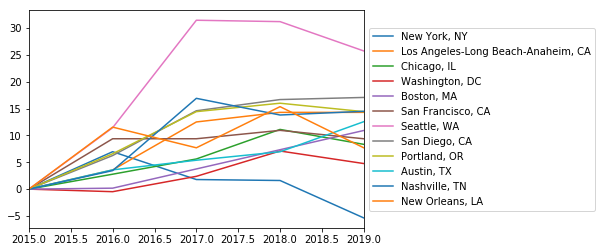

In [62]:
new_zillow_pct_trend_3b.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [63]:
airbnb_3b_count_trend = total_3b_apt_list.groupby(['category','year'])['price'].agg('count').unstack()
airbnb_3b_count_trend

year,2015,2016,2017,2018,2019
category,,,,,
austin,783.0,NaN,1434.0,1521.0,1755.0
boston,180.0,254.0,446.0,715.0,740.0
chicago,373.0,NaN,553.0,807.0,958.0
losangeles,1139.0,1808.0,2832.0,3782.0,4154.0
nashville,271.0,531.0,947.0,1071.0,1067.0
neworleans,331.0,530.0,852.0,1009.0,1128.0
newyork,1644.0,2156.0,2317.0,3087.0,3287.0
oakland,83.0,142.0,NaN,300.0,300.0
portland,155.0,271.0,343.0,566.0,619.0


In [64]:
airbnb_3b_count_percentage_trend = calculate_percentage_change(airbnb_3b_count_trend)
airbnb_3b_count_percentage_trend

category,austin,boston,chicago,losangeles,nashville,neworleans,newyork,oakland,portland,sandiego,sanfrancisco,seattle,washington
year,,,,,,,,,,,,,
2015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016,41.570881,41.111111,24.128686,58.735733,95.940959,60.120846,31.143552,71.084337,74.838710,96.912114,62.355658,40.268456,89.045936
2017,83.141762,147.777778,48.257373,148.639157,249.446494,157.401813,40.936740,166.265060,121.290323,161.876485,71.362587,118.624161,178.091873
2018,94.252874,297.222222,116.353887,232.045654,295.202952,204.833837,87.773723,261.445783,265.161290,226.840855,0.692841,196.979866,231.095406
2019,124.137931,311.111111,156.836461,264.705882,293.726937,240.785498,99.939173,261.445783,299.354839,269.358670,51.501155,220.805369,236.042403


In [65]:
airbnb_3b_price_trend = total_3b_apt_list.groupby(['category','year'])['price'].agg('mean').unstack()
airbnb_3b_price_trend

year,2015,2016,2017,2018,2019
category,,,,,
austin,431.536398,NaN,395.785914,351.006575,399.564103
boston,307.633333,279.582677,255.033632,258.360839,318.187838
chicago,265.396783,NaN,191.531646,189.118959,174.206681
losangeles,302.232660,297.425332,283.690325,277.494976,279.316803
nashville,265.616236,249.854991,238.165787,232.864613,251.746954
neworleans,268.873112,245.732075,237.839202,214.901883,240.417553
newyork,307.925791,263.015770,257.241692,247.544218,246.592942
oakland,239.867470,257.316901,NaN,199.340000,206.810000
portland,155.587097,160.701107,161.629738,169.620141,171.728595


In [66]:
airbnb_3b_price_percentage_trend = calculate_percentage_change(airbnb_3b_price_trend)
airbnb_3b_price_percentage_trend

category,austin,boston,chicago,losangeles,nashville,neworleans,newyork,oakland,portland,sandiego,sanfrancisco,seattle,washington
year,,,,,,,,,,,,,
2015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016,-4.142233,-9.118211,-13.915982,-1.590605,-5.933841,-8.606676,-14.584690,7.274614,3.286912,2.133261,43.634571,-13.087370,45.921733
2017,-8.284466,-17.098180,-27.831964,-6.135120,-10.334628,-11.542214,-16.459842,-4.810581,3.883767,-2.714670,33.287898,-11.155978,91.843466
2018,-18.661189,-16.016630,-28.741051,-8.184980,-12.330430,-20.073122,-19.609131,-16.895776,9.019414,-7.562602,6.450945,-9.224585,42.578999
2019,-7.408945,3.430872,-34.359912,-7.582191,-5.221549,-10.583267,-19.918062,-13.781556,10.374574,-8.154559,3.466699,1.242942,22.768443


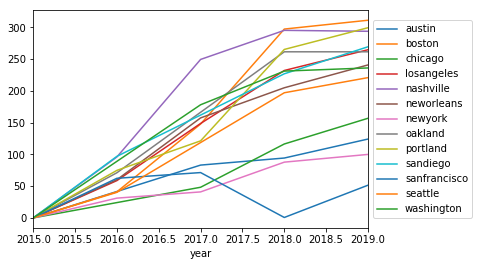

In [67]:
airbnb_3b_count_percentage_trend.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

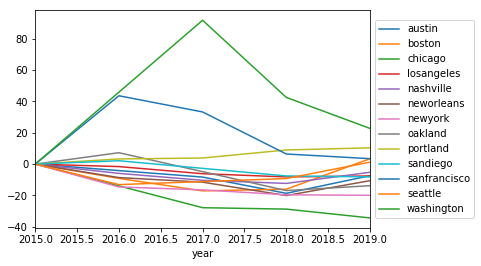

In [68]:
airbnb_3b_price_percentage_trend.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [69]:
get_correlation_from_two_different_data(new_zillow_pct_trend_3b,airbnb_3b_count_percentage_trend)

New york -0.4986235593063281
Los Angeles 0.9600842576447988
Chicago 0.8810423201081028
Washington 0.8674748427545995
Boston 0.9674574470977172
San Francisco 0.48009854303255817
Seattle 0.8512460906832757
San Diego 0.9685667203188331
Portland 0.8587821953732943
Austin 0.9550560631695473
Nashville 0.9530749807212949
New Orleans 0.565596558018592


In [70]:
get_correlation_from_two_different_data(new_zillow_pct_trend_3b,airbnb_3b_price_percentage_trend)

New york 0.10220274401334256
Los Angeles -0.9940451511333678
Chicago -0.8860018914821067
Washington 0.11086019598724822
Boston 0.1506220904599977
San Francisco 0.417885928829364
Seattle -0.3096187830605183
San Diego -0.8333077250453075
Portland 0.8389450975320694
Austin -0.49047058644916147
Nashville -0.7761589836656431
New Orleans -0.9059289131999946


### Founding in this project:


After we conduct three analysis on different number of bedrooms apt to explore the relationship between the total number of listing on airbnb and long term rental rate on Zillow, we can find below insights.

1.Among all type of apratments (1b, 2b or 3b), beside New york and New Orleans, all other big cities has a strong positive correlation between the number of listings on airbnb and the price of long term rental rate on Zillow. 

2.Among all type of apratments (1b, 2b or 3b), there are no obvious correlation between the price of airbnb and the price of long term rental rate on Zillow.

### Future work:

In order to prove the causation of airbnb and long term rental rate and housing price. We will try to control the unobserved factor in the dataset.

1.Control Zip-code level effect to compare the area that has airbnb housing and the areas that does not have airbnb housing. 2.Control Arbitrary city level time trends, such as popularity, economic growth rate of specific city, to eliminate other factors that we do not want to involve in.

After eliminate those factors we can see the real effect that airbnb put on the long term rental rate market and housing market.

In [71]:
import doctest

doctest.testmod(verbose=True)

Trying:
    pct_change = calculate_percentage_change(airbnb_1b_count_trend)
Expecting nothing
ok
Trying:
    pct_change['austin']
Expecting:
    year
    2015      0.000000
    2016     42.604502
    2017     85.209003
    2018    108.467310
    2019    132.475884
    Name: austin, dtype: float64
ok
Trying:
    airbnb_listing = get_airbnb_listing("2019","Chicago")
Expecting nothing
ok
Trying:
    airbnb_listing['price'].head(10)
Expecting:
    0     $50.00
    1    $117.00
    2    $255.00
    3     $80.00
    4    $150.00
    5     $35.00
    6    $215.00
    7     $99.00
    8    $289.00
    9     $99.00
    Name: price, dtype: object
ok
Trying:
    all_list = get_all_list_from_airbnb([2015,2017,2018,2019],"Chicago")
Expecting nothing
ok
Trying:
    all_list['price'].head(10)
Expecting:
    0    142.0
    1    120.0
    2     85.0
    3    125.0
    4     75.0
    5     95.0
    6    275.0
    7    175.0
    8    100.0
    9     80.0
    Name: price, dtype: float64
ok
Trying:
    get

TestResults(failed=0, attempted=9)